/home/jiahan/miniconda3/envs/sfmLearner/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


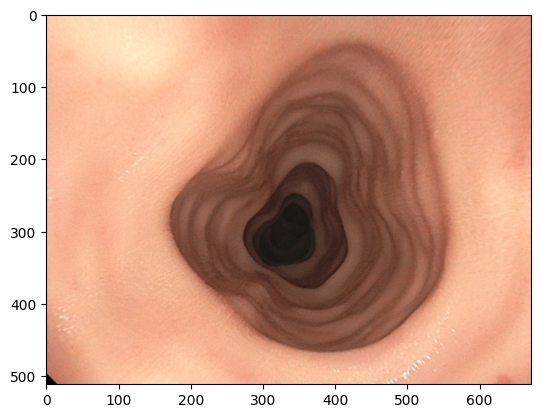

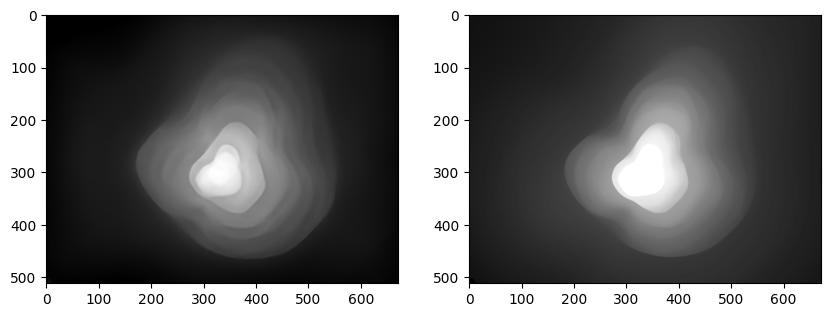

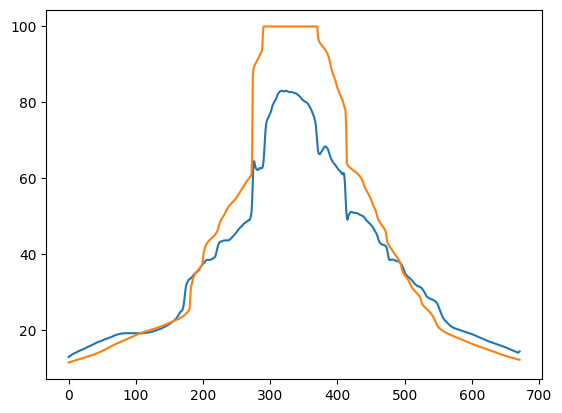

In [1]:
import matplotlib.pyplot as plt
from util_api import load_dispNet, infer_model
import numpy as np
import torch
import models

path = "/home/jiahan/jiahan/checkpoints/SC_Depth_on_C3VD/scenes_all_lossDepth-Anything/24-04-22-20:45/dispnet_4_checkpoint.pth.tar"
model = load_dispNet(path)

img_path = "/home/jiahan/jiahan/datasets/C3VD/.dataset4SCDepth/scene_trans_t1_a/00050.jpg"
gt_path = "/home/jiahan/jiahan/datasets/C3VD/.dataset4SCDepth/scene_trans_t1_a/depth_gt/00050.npy"

pred = infer_model(model, img_path)
gt = np.load(gt_path)
pred = pred * np.median(gt)/np.median(pred)


plt.imshow(plt.imread(img_path))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(pred, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gt, cmap='gray')

plt.figure()
plt.plot(pred[300], label='pred')
plt.plot(gt[300], label='gt')


### tmp

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
loss1s = np.load("./loss1.npy")
print(loss1s.shape)

(133,)


loss1s.mean is  0.07565009246643324
loss1s.max and min are  0.15129947662353516 0.02862762100994587


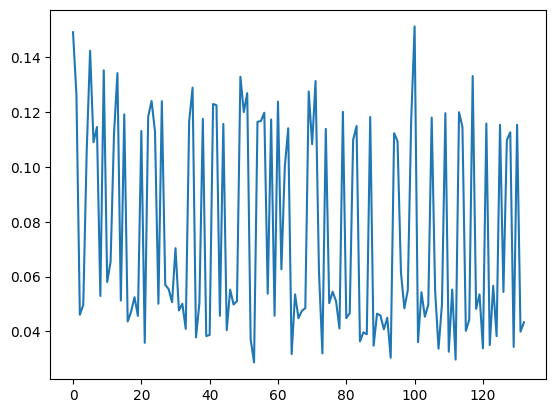

In [9]:
plt.plot(loss1s)
print("loss1s.mean is ", loss1s.mean())
print("loss1s.max and min are ", loss1s.max(), loss1s.min())

## Residual

In [1]:
import numpy as np
import matplotlib.pyplot as plt


(2, 1, 512, 672)
0.125 -0.12481302


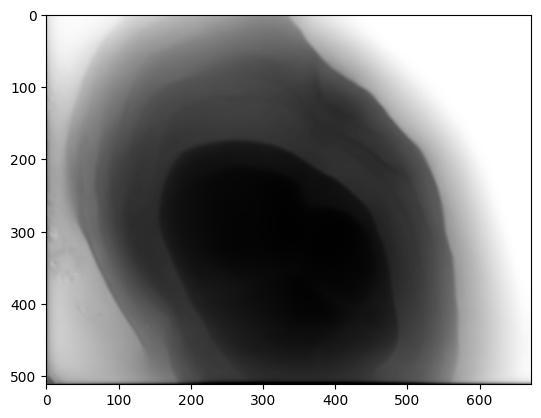

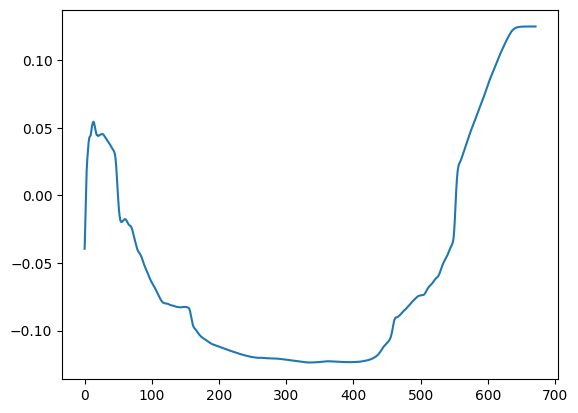

In [5]:

residual = np.load("./tmp/residual_30.npy")
print(residual.shape)
print(residual.max(),residual.min())

plt.imshow(residual[0][0]+0.125,cmap='gray')
plt.figure()
plt.plot(residual[0][0][300])

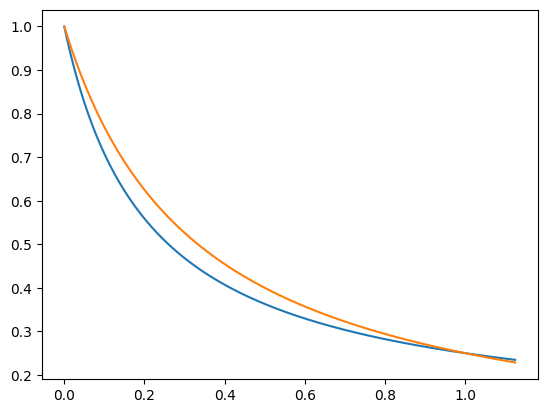

In [12]:
x = np.linspace(0,1.125,1000)
y1 = 1/ (3*np.log2(1+ x)+1)
y2 = 1/ (3*x+1)

plt.plot(x,y1)
plt.plot(x,y2)

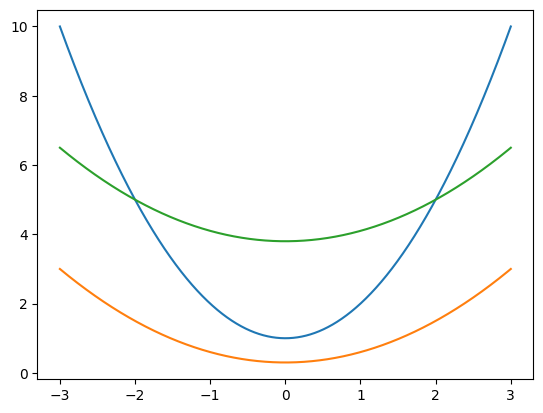

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def func1(z):
    return z**2 + 1

x = np.linspace(-3,3,10000)
y = sigmoid(x)
y = func1(x)

plt.plot(x,y)
plt.plot(x,0.3*y)
plt.plot(x,0.3*(y-5)+5)

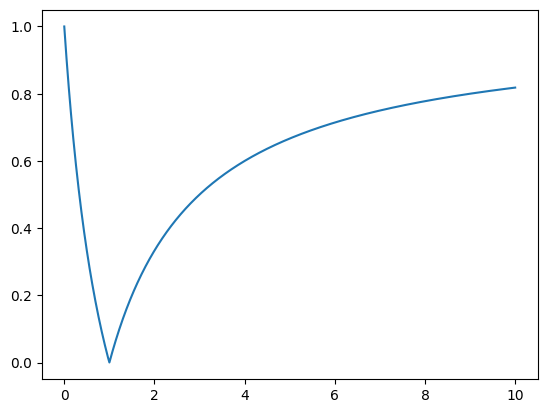

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return abs(1-x)/(1+x)

x = np.linspace(0,10,1000)
y = func(x)

plt.plot(x,y)

### 查看灰度范围

查看灰度值的范围，添加灰度值损失，在高光出使用强监督损失

(512, 672, 3)


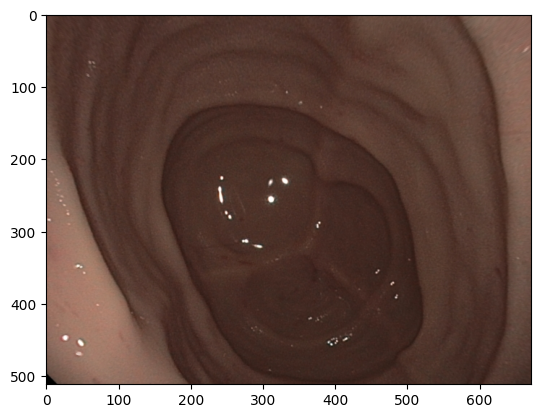

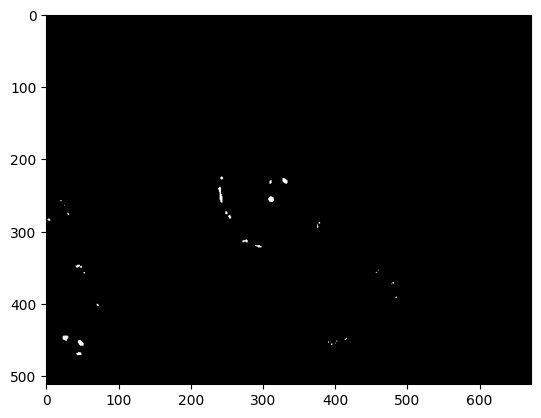

In [13]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("/home/jiahan/jiahan/datasets/C3VD/dataset_cecum_t1_a_4SCDepth/scenes/scene1/00128.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)/255.0
print(img1.shape)
plt.imshow(img1)

plt.figure()
mask = img1[...,0] > 0.8
plt.imshow(mask,cmap='gray')